# 순환 신경망 - 나비야
#### 출처: [순환 신경망 모델 만들어보기](https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/)

## 상태유지 LSTM 모델
- 상태유지 모드에서는 현재 샘플의 학습 상태가 다음 샘플의 초기 상태로 전달된다.

In [2]:
# 사용할 패키지 불러오기
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback

In [3]:
# 랜덤시드 고정시키기
np.random.seed(5)

In [4]:
# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [5]:
# 데이터 준비하기

# 코드 사전 정의
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [6]:
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [7]:
# 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)
dataset.shape

(50, 5)

In [8]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

MAX_IDX_VALUE = 13

In [9]:
# 입력값 정규화 시키기
x_train = x_train / float(MAX_IDX_VALUE)
x_train.shape

(50, 4)

In [10]:
# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

In [11]:
# 라벨값에 대한 one-hot 인코딩 수행
y_train = to_categorical(y_train)
one_hot_vec_size = y_train.shape[1]
one_hot_vec_size

12

In [12]:
# 손실 이력 클래스 정의
class LossHistory(Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [13]:
# 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 128)                  66560     
_________________________________________________________________
dense (Dense)                (1, 12)                   1548      
Total params: 68,108
Trainable params: 68,108
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# 모델 학습시키기
num_epochs = 201
history = LossHistory()
history.init()

for epoch_idx in range(num_epochs):
    if epoch_idx % 50 == 0:
        print("======================= " + str(epoch_idx) + " =======================")
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False,
              callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()


======================= 0 =======================
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50 samples
50/50 - 1s - loss: 2.3357 - acc: 0.2800
Train on 50 samples
50/50 - 0s - loss: 2.0125 - acc: 0.3400
Train on 50 samples
50/50 - 0s - loss: 1.9645 - acc: 0.3400
Train on 50 samples
50/50 - 0s - loss: 1.9471 - acc: 0.3400
Train on 50 samples
50/50 - 0s - loss: 1.9377 - acc: 0.3400
Train on 50 samples
50/50 - 0s - loss: 1.9309 - acc: 0.3400
Train on 50 samples
50/50 - 0s - loss: 1.9257 - acc: 0.3400
Train on 50 samples
50/50 - 0s - loss: 1.9214 - acc: 0.3400
Train on 50 samples
50/50 - 0s - loss: 1.9176 - acc: 0.3400
Train on 50 samples
50/50 - 0s - loss: 1.9141 - acc: 0.3400
Train on 50 samples
50/50 - 0s - loss: 1.9108 - acc: 0.3400
Train on 50 samples
50/50 - 0s - loss: 1.9075 - acc: 0.3600
Train on 50 samples
50/50 - 0s - loss: 1.9040 - acc: 0.3600
Train on 50 samples
50/50 - 0s - loss: 1.9001 - acc: 0.3600
Train on 50 samp

Train on 50 samples
50/50 - 0s - loss: 0.8874 - acc: 0.7000
Train on 50 samples
50/50 - 0s - loss: 0.7010 - acc: 0.7000
Train on 50 samples
50/50 - 0s - loss: 0.6862 - acc: 0.7600
Train on 50 samples
50/50 - 0s - loss: 0.9585 - acc: 0.5400
Train on 50 samples
50/50 - 0s - loss: 1.2037 - acc: 0.4800
Train on 50 samples
50/50 - 0s - loss: 0.7904 - acc: 0.6400
Train on 50 samples
50/50 - 0s - loss: 0.7634 - acc: 0.7600
Train on 50 samples
50/50 - 0s - loss: 0.8321 - acc: 0.6600
Train on 50 samples
50/50 - 0s - loss: 0.7341 - acc: 0.7200
Train on 50 samples
50/50 - 0s - loss: 0.7656 - acc: 0.7200
Train on 50 samples
50/50 - 0s - loss: 0.7610 - acc: 0.7000
Train on 50 samples
50/50 - 0s - loss: 0.8305 - acc: 0.7000
Train on 50 samples
50/50 - 0s - loss: 1.1008 - acc: 0.5800
Train on 50 samples
50/50 - 0s - loss: 0.8474 - acc: 0.6600
Train on 50 samples
50/50 - 0s - loss: 0.9121 - acc: 0.5600
Train on 50 samples
50/50 - 0s - loss: 0.7219 - acc: 0.7400
Train on 50 samples
50/50 - 0s - loss: 0

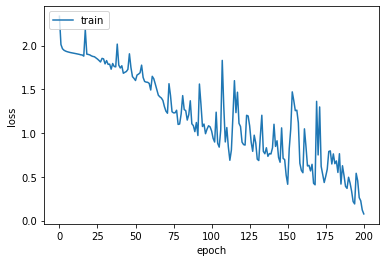

In [16]:
# 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
# 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

50/50 [==============================] - 0s 6ms/sample - loss: 0.0703 - acc: 1.0000
acc: 100.00%


In [18]:
# 모델 사용하기
pred_count = 50   # 최대 예측 개수 정의

In [19]:
# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
model.reset_states()

print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


#### [노래 듣기](http://tykimos.github.io/warehouse/2017-4-9-Stateful_LSTM_f1_one_step_prediction.mp3)

In [20]:
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(MAX_IDX_VALUE) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(MAX_IDX_VALUE))
    seq_in.pop(0)
model.reset_states()
    
print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


#### [노래듣기](http://tykimos.github.io/warehouse/2017-4-9-Stateful_LSTM_f1_full_song_prediction.mp3)